# Analisis Varians (ANOVA) di Python

## Latar Belakang

Analisis varians (ANOVA) adalah metode statistik untuk menentukan apakah terdapat perbedaan yang signifikan antara rata-rata dari tiga kelompok atau lebih. ANOVA sangat berguna dalam eksperimen yang melibatkan lebih dari dua perlakuan atau kondisi. 

Metode ini memperluas konsep uji-t dua sampel dengan menghindari masalah inflasi *Type I error* jika kita melakukan beberapa uji-t secara terpisah.

---

## Perbedaan antara t-test dan F-test

- **t-test**: digunakan untuk membandingkan **dua rata-rata**.
- **F-test (ANOVA)**: digunakan untuk membandingkan **tiga atau lebih rata-rata**.

Jika kita memiliki tiga kelompok, maka menggunakan uji t-tes secara berulang (pasangan-pasangan) akan meningkatkan peluang kesalahan. ANOVA menyelesaikan masalah ini dengan satu uji komprehensif.

---

## Apa itu p-value dan bagaimana menghitungnya?

ANOVA menghitung dua jenis variabilitas:
- **Variasi antar kelompok**: Seberapa jauh rata-rata tiap kelompok dari rata-rata keseluruhan.
- **Variasi dalam kelompok**: Seberapa jauh data dalam satu kelompok dari rata-rata kelompoknya.

Rasio dari kedua variasi ini disebut **F-statistik**, dan digunakan untuk menghitung p-value berdasarkan distribusi F.

---

## Apa Arti dari p-value?

- **p-value kecil (< 0.05)**: Ada perbedaan signifikan antar kelompok, sehingga kita **tolak H₀** (setidaknya satu rata-rata berbeda).
- **p-value besar (≥ 0.05)**: Tidak ada bukti cukup bahwa rata-rata berbeda, sehingga kita **gagal menolak H₀**.





## Latar Belakang
Analisis varians (ANOVA) adalah metode statistik untuk menguji apakah terdapat perbedaan signifikan antara rata-rata dari tiga kelompok atau lebih. Metode ini umum digunakan dalam eksperimen untuk mengetahui apakah perlakuan yang berbeda menghasilkan efek yang berbeda pula.

## Perbedaan antara t-test dan F-test
**t-test** digunakan untuk membandingkan rata-rata dari dua kelompok, sedangkan **F-test** (ANOVA) digunakan untuk membandingkan tiga kelompok atau lebih.

## Apa itu p-value dan bagaimana menghitungnya?
p-value menunjukkan seberapa besar kemungkinan bahwa perbedaan yang diamati antara kelompok terjadi secara kebetulan. Dalam ANOVA, p-value dihitung dari distribusi F dengan menggunakan rasio antara variasi antar kelompok dan variasi dalam kelompok.

## Studi Kasus 1: Efektivitas Metode Belajar Online

Seorang dosen ingin mengetahui apakah metode belajar online yang berbeda memengaruhi nilai akhir mahasiswa. Tiga metode digunakan:

- **Video Interaktif**
- **Zoom Meeting**
- **Forum Diskusi**

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Simulasi data
np.random.seed(10)
video = np.random.normal(80, 5, 30)
zoom = np.random.normal(75, 6, 30)
forum = np.random.normal(78, 4, 30)

# Uji ANOVA
f_stat, p_val = stats.f_oneway(video, zoom, forum)

print(f"F-statistik: {f_stat:.3f}")
print(f"p-value: {p_val:.3f}")

F-statistik: 9.522
p-value: 0.000


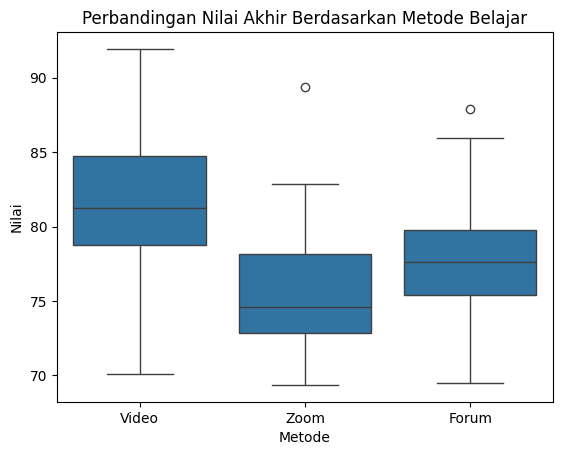

In [26]:
df = pd.DataFrame({
    'Nilai': np.concatenate([video, zoom, forum]),
    'Metode': ['Video']*30 + ['Zoom']*30 + ['Forum']*30
})

sns.boxplot(x='Metode', y='Nilai', data=df)
plt.title('Perbandingan Nilai Akhir Berdasarkan Metode Belajar')
plt.show()


## Studi Kasus 2: Pengaruh Jenis Pupuk terhadap Hasil Panen

Seorang petani ingin mengetahui apakah jenis pupuk memengaruhi hasil panen tomat. Ada tiga jenis pupuk:
- **Pupuk A**
- **Pupuk B**
- **Pupuk C**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro, levene

In [3]:
# Simulasi data
pupuk_a = np.random.normal(55, 5, 20)
pupuk_b = np.random.normal(60, 4, 20)
pupuk_c = np.random.normal(58, 6, 20)

# Uji ANOVA
f_stat2, p_val2 = stats.f_oneway(pupuk_a, pupuk_b, pupuk_c)

print(f"F-statistik: {f_stat2:.3f}")
print(f"p-value: {p_val2:.3f}")


F-statistik: 9.960
p-value: 0.000


In [4]:
# Gabungkan data ke dalam DataFrame
df2 = pd.DataFrame({
    'Hasil': np.concatenate([pupuk_a, pupuk_b, pupuk_c]),
    'Pupuk': ['A']*20 + ['B']*20 + ['C']*20
})

# Statistik Deskriptif
print("=== Statistik Deskriptif ===")
print(df2.groupby('Pupuk')['Hasil'].describe())


=== Statistik Deskriptif ===
       count       mean       std        min        25%        50%        75%  \
Pupuk                                                                           
A       20.0  53.514654  4.898096  44.436303  51.444015  53.867046  55.902814   
B       20.0  60.961588  4.617183  50.666752  57.800507  60.680732  63.471430   
C       20.0  55.626785  6.589693  44.317260  49.419958  55.551658  61.850076   

             max  
Pupuk             
A      63.228324  
B      69.936961  
C      64.599057  


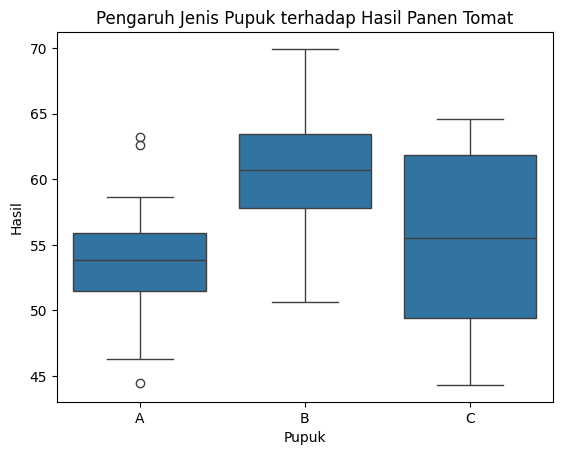

In [5]:
# Visualisasi boxplot
sns.boxplot(x='Pupuk', y='Hasil', data=df2)
plt.title('Pengaruh Jenis Pupuk terhadap Hasil Panen Tomat')
plt.show()

In [6]:
# Uji Normalitas
print("\n=== Uji Normalitas (Shapiro-Wilk) per Jenis Pupuk ===")
for pupuk in df2['Pupuk'].unique():
    nilai = df2[df2['Pupuk'] == pupuk]['Hasil']
    stat, p = shapiro(nilai)
    print(f"Pupuk {pupuk}: p-value = {p:.4f}")


=== Uji Normalitas (Shapiro-Wilk) per Jenis Pupuk ===
Pupuk A: p-value = 0.5976
Pupuk B: p-value = 0.9942
Pupuk C: p-value = 0.0952


In [7]:
# Uji Homogenitas
print("\n=== Uji Homogenitas Varians (Levene) ===")
groups2 = [df2[df2['Pupuk'] == pupuk]['Hasil'] for pupuk in df2['Pupuk'].unique()]
stat, p = levene(*groups2)
print(f"Levene p-value = {p:.4f}")


=== Uji Homogenitas Varians (Levene) ===
Levene p-value = 0.0697


In [8]:
# Uji ANOVA
print("\n=== Model ANOVA (OLS) ===")
model2 = smf.ols('Hasil ~ C(Pupuk)', data=df2).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
print(anova_table2)


=== Model ANOVA (OLS) ===
               sum_sq    df        F    PR(>F)
C(Pupuk)   589.186937   2.0  9.95991  0.000195
Residual  1685.941695  57.0      NaN       NaN


In [9]:
# Model OLS dan ANOVA
model2 = smf.ols('Hasil ~ C(Pupuk)', data=df2).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)

# Interpretasi hasil ANOVA
p_val2 = anova_table2['PR(>F)'].iloc[0]
if p_val2 < 0.05:
    print("\n>> Ada perbedaan signifikan antar jenis pupuk.")
else:
    print("\n>> Tidak ada perbedaan signifikan antar jenis pupuk.")


>> Ada perbedaan signifikan antar jenis pupuk.



=== Residual Analysis ===


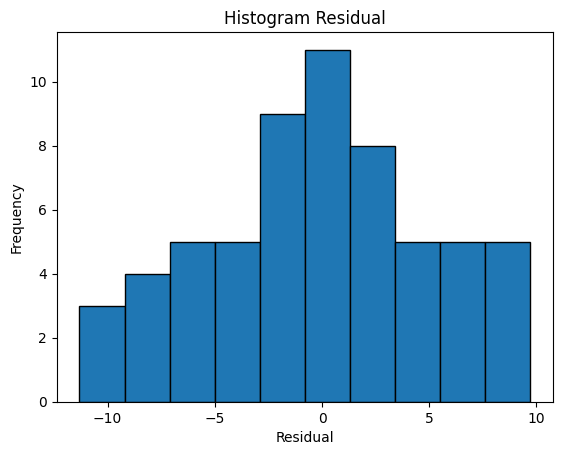

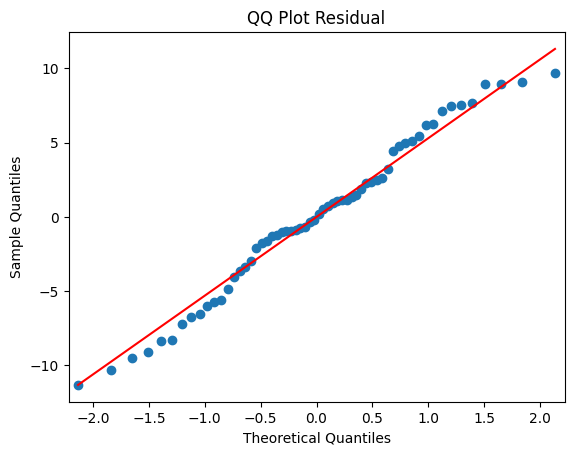

In [10]:
# Analisis Residual
print("\n=== Residual Analysis ===")
resid2 = model2.resid

plt.hist(resid2, bins=10, edgecolor='k')
plt.title("Histogram Residual")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

sm.qqplot(resid2, line='s')
plt.title("QQ Plot Residual")
plt.show()

In [11]:
# Post hoc test jika signifikan
if p_val2 < 0.05:
    print("\n=== Post Hoc Test (Tukey HSD) ===")
    tukey2 = pairwise_tukeyhsd(endog=df2['Hasil'], groups=df2['Pupuk'], alpha=0.05)
    print(tukey2)


=== Post Hoc Test (Tukey HSD) ===
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   7.4469 0.0002  3.3083 11.5855   True
     A      C   2.1121 0.4417 -2.0265  6.2507  False
     B      C  -5.3348 0.0083 -9.4734 -1.1962   True
----------------------------------------------------


In [12]:
# Ringkasan Model
print("\n=== Ringkasan Model OLS ===")
print(model2.summary())


=== Ringkasan Model OLS ===
                            OLS Regression Results                            
Dep. Variable:                  Hasil   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     9.960
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           0.000195
Time:                        18:00:15   Log-Likelihood:                -185.21
No. Observations:                  60   AIC:                             376.4
Df Residuals:                      57   BIC:                             382.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        

## Interpretasi dan Kesimpulan
Jika p-value < 0.05, berarti terdapat perbedaan signifikan antara rata-rata dari kelompok yang diuji.

Jika p-value ≥ 0.05, maka tidak ada perbedaan yang signifikan.

Studi kasus di atas menunjukkan bagaimana ANOVA dapat digunakan untuk membuat keputusan berbasis data dalam dunia pendidikan maupun pertanian.